In [41]:
import networkx as nx

In [42]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3,'u','v'])
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [43]:
G.add_edge(1,2)
G.add_edge('u','v')

G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])
G.add_edge("u","w")

G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [44]:
G.remove_node(2)
G.nodes()

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [45]:
G.remove_nodes_from([4,5])
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [46]:
G.remove_edge(1,3)
G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [47]:
G.remove_edges_from([(1,2),('u','v')])
G.edges()

EdgeView([(1, 6), ('u', 'w')])

In [48]:
G.number_of_nodes()

6

In [49]:
G.number_of_edges()

2

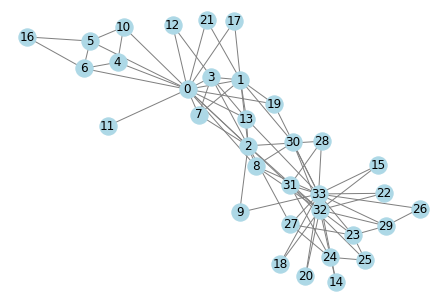

In [50]:
import matplotlib.pyplot as plt
G=nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.savefig('karate_graph.pdf')

In [51]:
G.degree() #get access to Dict where keys are nodeIDs and values are corresponding degrees of the nodes

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [52]:
G.degree(33) #look up a degree of a given node in a dict

17

In [53]:
G.degree()[33] #return a dict, G.degree(33) is G.degree()[33]

17

In [54]:
G.number_of_nodes()

34

In [55]:
from scipy.stats import bernoulli
bernoulli.rvs(p=0.2)

0

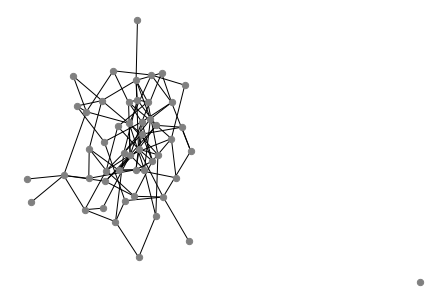

In [56]:
N=20
p=0.2

def er_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))

    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p): #return 1 is True, 0 is False
                G.add_edge(node1, node2)
    return G

nx.draw(er_graph(50,0.08), node_size=40, node_color="gray")
plt.savefig("er1.pdf")

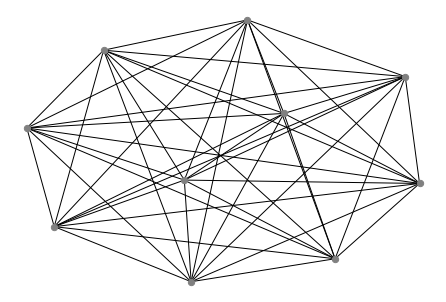

In [57]:
nx.draw(er_graph(10,1.0), node_size=40, node_color="gray")


In [58]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")

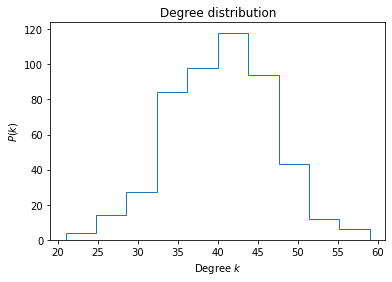

In [59]:
G = er_graph(500,0.08)
plot_degree_distribution(G)
plt.savefig("hist1.pdf")

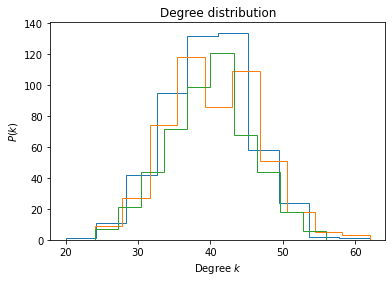

In [60]:
G1 = er_graph(500,0.08)
plot_degree_distribution(G1)
G2 = er_graph(500,0.08)
plot_degree_distribution(G2)
G3 = er_graph(500,0.08)
plot_degree_distribution(G3)
plt.savefig("hist3.pdf")

In [61]:
import numpy as np
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv",delimiter=",")
A2=np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

In [62]:
G1=nx.to_networkx_graph(A1)
G2=nx.to_networkx_graph(A2)

In [63]:
def basic_net_stats(G):
    print ("Number of nodes: %d" % G.number_of_nodes())
    print ("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [64]:
basic_net_stats(G1)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08


In [65]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


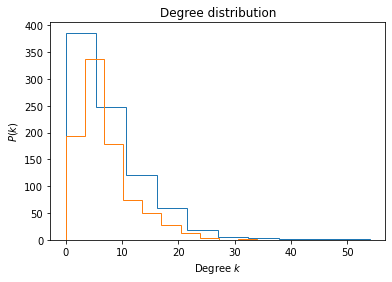

In [66]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")

In [122]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [123]:
gen1 = connected_component_subgraphs(G1)
gen2 = connected_component_subgraphs(G2)

In [135]:
#g1 = gen1.__next__ #generate next component of a graph

In [136]:
G1.number_of_nodes()

843

In [137]:
#len(gen1.__next__())

In [127]:
G1_LCC=max(gen1, key=len)
G2_LCC=max(gen2, key=len)

In [128]:
len(G1_LCC)

825

In [129]:
G1_LCC.number_of_nodes()

825

In [130]:
fraction_G1 = G1_LCC.number_of_nodes() / G1.number_of_nodes() 
fraction_G2 = G2_LCC.number_of_nodes() / G2.number_of_nodes()

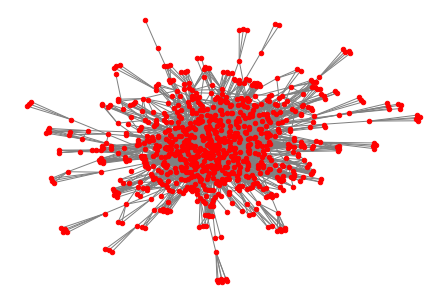

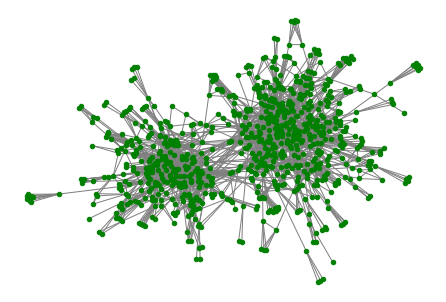

In [132]:
plt.figure()
nx.draw(G1_LCC, node_color='red', edge_color='gray', node_size=20)
plt.savefig('village1.pdf')

plt.figure()
nx.draw(G2_LCC, node_color='green', edge_color='gray', node_size=20)
plt.savefig('village2.pdf')